In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np 

from multicam.tng.utils import convert_tng_mass

from tqdm import tqdm

## Extract data

In [4]:
def convert_tng_mass2(gmass):
    """Convert TNG mass to log10(Msun)."""
    # TNG units are 1e10 Msun / h; https://www.tng-project.org/data/docs/specifications
    # return in units of log10(Msun)
    # robust to 0 mass
    return np.where(gmass > 0, np.log10(gmass * 1e10), 0)


In [6]:
# get gmass over all files 
subhalo_ids = []
subhalo_mass = []
stellar_mass = []
group_mass = [] 
hat_group_mass = [] 

count = 0
for ii in tqdm(range(0, 448)):
    filename = f'../../data/tng/tng100-99/fof_subhalo_tab_099.{ii}.hdf5'
    with h5py.File(filename, 'r') as f:

        if 'GroupMass' in f['Group'].keys():
            for s in f['Group']['GroupMass']:
                group_mass.append(s)
            for s in f['Group']['Group_M_TopHat200']:
                hat_group_mass.append(s)
            

        if 'SubhaloMass' in f['Subhalo'].keys():
            for s in f['Subhalo']['SubhaloMass']:
                subhalo_ids.append(count)
                subhalo_mass.append(s)
                count+=1

            for s in f['Subhalo']['SubhaloMass']:
                subhalo_ids.append(count)
                subhalo_mass.append(s)
                count+=1

            for s in f['Subhalo']['SubhaloMassInRadType'][:,4]: # 4 = star particles
                stellar_mass.append(s) 


subhalo_ids = np.array(subhalo_ids)
subhalo_mass = convert_tng_mass2(np.array(subhalo_mass)) # log10(Msun / h)
stellar_mass = convert_tng_mass2(np.array(stellar_mass)) # log10(Msun / h)
group_mass = convert_tng_mass2(np.array(group_mass))
hat_group_mass = convert_tng_mass2(np.array(hat_group_mass))

  0%|          | 0/448 [00:00<?, ?it/s]

100%|██████████| 448/448 [00:44<00:00,  9.98it/s]
/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_83225/411574188.py:6: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10), 0)


In [4]:
subhalo_ids

array([      0,       1,       2, ..., 4371208, 4371209, 4371210],
      shape=(4371211,))

In [9]:
stellar_mass.min()


np.float32(0.0)

In [10]:
subhalo_ids.shape, subhalo_mass.shape, stellar_mass.shape, 

((4371211,), (4371211,), (4371211,))

## Colors

In [5]:
file = "../../data/tng/Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc_099.hdf5"

In [6]:
fc = h5py.File(file, 'r')

In [7]:
fc.keys()

<KeysViewHDF5 ['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc', 'subhaloIDs']>

In [8]:
fc['subhaloIDs'][:]

array([      0,       1,       2, ..., 4371208, 4371209, 4371210],
      shape=(4371211,), dtype=int32)

In [14]:
sdss_g = fc['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:, 1, 0]
sdss_i = fc['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:, 3, 0]
gi = sdss_g - sdss_i
gi.shape

(4371211,)

In [16]:
np.sum(np.isnan(gi)) / len(gi)

np.float64(0.9229625382988833)

In [17]:
fc['subhaloIDs'][:].shape

(4371211,)

## L* sample

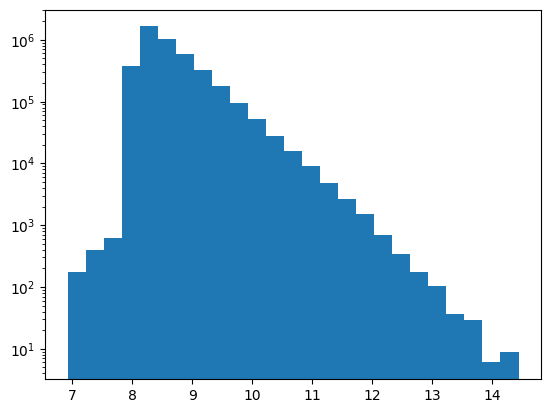

In [18]:
plt.hist(subhalo_mass, bins=25)
plt.yscale('log')

In [19]:
sum((subhalo_mass < 12.2) & (subhalo_mass > 11.8))

np.int64(1512)

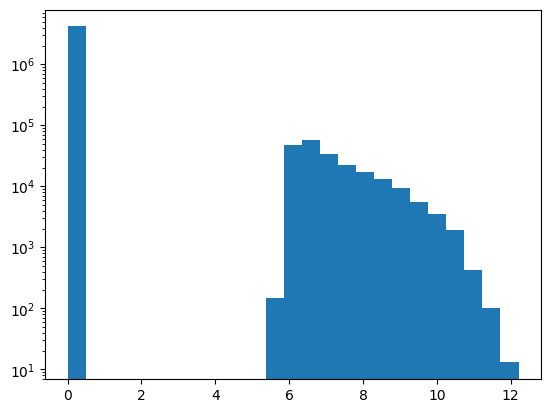

In [20]:
plt.hist(stellar_mass, bins=25)
plt.yscale('log')

In [25]:
mask = stellar_mass > 8.75
_gi = gi[mask]
_gi.shape

(22039,)

In [28]:
np.sum(np.isnan(_gi)) / len(_gi)

np.float64(0.0)

(array([1.000e+00, 1.000e+00, 3.000e+00, 1.200e+01, 4.000e+01, 7.800e+01,
        1.250e+02, 2.280e+02, 4.420e+02, 6.850e+02, 9.880e+02, 1.234e+03,
        1.506e+03, 1.636e+03, 1.681e+03, 1.497e+03, 1.316e+03, 1.005e+03,
        8.500e+02, 7.220e+02, 6.000e+02, 5.550e+02, 4.570e+02, 6.210e+02,
        9.520e+02, 1.218e+03, 1.427e+03, 1.410e+03, 5.880e+02, 1.350e+02,
        2.600e+01]),
 array([0.13386917, 0.17196901, 0.21006885, 0.24816871, 0.28626853,
        0.32436839, 0.36246824, 0.40056807, 0.43866792, 0.47676778,
        0.5148676 , 0.55296743, 0.59106731, 0.62916714, 0.66726696,
        0.70536685, 0.74346668, 0.7815665 , 0.81966639, 0.85776621,
        0.89586604, 0.93396592, 0.97206575, 1.01016557, 1.04826546,
        1.08636522, 1.12446511, 1.16256499, 1.20066476, 1.23876464,
        1.27686453, 1.31496429]),
 <BarContainer object of 31 artists>)

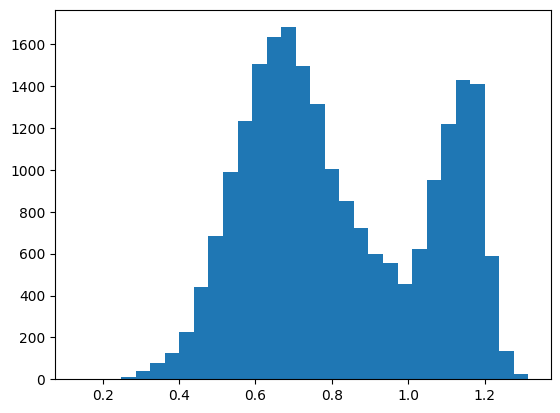

In [29]:
plt.hist(_gi, bins=31)

## Playground

In [19]:
file = f'../../data/tng/100/fof_subhalo_tab_099.99.hdf5'

In [20]:
f = h5py.File(file, 'r')

In [21]:
f.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [9]:
sorted(f['Subhalo'].keys())

['SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloBfldDisk',
 'SubhaloBfldHalo',
 'SubhaloCM',
 'SubhaloFlag',
 'SubhaloGasMetalFractions',
 'SubhaloGasMetalFractionsHalfRad',
 'SubhaloGasMetalFractionsMaxRad',
 'SubhaloGasMetalFractionsSfr',
 'SubhaloGasMetalFractionsSfrWeighted',
 'SubhaloGasMetallicity',
 'SubhaloGasMetallicityHalfRad',
 'SubhaloGasMetallicityMaxRad',
 'SubhaloGasMetallicitySfr',
 'SubhaloGasMetallicitySfrWeighted',
 'SubhaloGrNr',
 'SubhaloHalfmassRad',
 'SubhaloHalfmassRadType',
 'SubhaloIDMostbound',
 'SubhaloLen',
 'SubhaloLenType',
 'SubhaloMass',
 'SubhaloMassInHalfRad',
 'SubhaloMassInHalfRadType',
 'SubhaloMassInMaxRad',
 'SubhaloMassInMaxRadType',
 'SubhaloMassInRad',
 'SubhaloMassInRadType',
 'SubhaloMassType',
 'SubhaloParent',
 'SubhaloPos',
 'SubhaloSFR',
 'SubhaloSFRinHalfRad',
 'SubhaloSFRinMaxRad',
 'SubhaloSFRinRad',
 'SubhaloSpin',
 'SubhaloStarMetalFractions',
 'SubhaloStarMetalFractionsHalfRad',
 'SubhaloStarMetalFractionsMaxRad',
 'SubhaloStarMetalli

In [23]:
f['Subhalo']['SubhaloMass'].shape, f['Subhalo']['SubhaloMassInRadType'].shape # 4th elements corresponds to star particles

((2478,), (2478, 6))

In [106]:
from multicam.tng.utils import convert_tng_mass

gmass = convert_tng_mass(f['Group']['Group_M_TopHat200'][:])